In [1]:
import pandas as pd
import numpy as np
import re

pd.options.display.max_columns = None

### `Question-1:`

The dataset is based on NFTs. This is quite large. So, when you will read the dataset, you have to wait. The link of the dataset: https://tinyurl.com/2pfhncqw

Your task is to make a pivote table by using the columns "verification_status", "contract_type", "rarity_score" and "last_sale_price" to find out the total values.

In [ ]:
'''df1=pd.read_csv("https://tinyurl.com/2pfhncqw")
df1
#link has expired.
df1.pivot_table(columns=["verification_status", "contract_type", "rarity_score","last_sale_price"],aggfunc="sum")'''

'df1=pd.read_csv("https://tinyurl.com/2pfhncqw")\ndf1\n#link has expired.\ndf1.pivot_table(columns=["verification_status", "contract_type", "rarity_score","last_sale_price"],aggfunc="sum")'

### `Question-2:`

You are given a dataset about the cars' price and miles driven of different cars throughout the different years. The link of the dataset: https://tinyurl.com/2r24n45l. Your tasks are
- make a pivot table of the brands (the required brands are given below) from the "Year" 2018 to the year 2022 in which the "Price" is shown as average values and "Miles" are in median values. In this pivote table, every row represents a particular brand and each column represents either average "Price" of a partucular year or median values of "Miles" of a particular year.
- At the end plot a kde chart for the "Price" and "Miles" by using your pivot table.

There are some challenges to solve this task:
- There is no column that is represented to the brand name of the car. You have to find out on your own.
- Some values of "Years" column are misleading. You have to reset this column too that every value should tell a valid meaning.

In [ ]:
cars=pd.read_csv("https://tinyurl.com/2r24n45l")
cars

,Name,Year,Miles,Price
0,Chevrolet Trax,2018,41946,16990
1,GMC Terrain,2020,45328,23990
2,Jeep Wrangler,2012,81068,21590
3,Jeep Renegade,2019,35372,21590
4,BMW X,20173,68992,22990
...,...,...,...,...
21995,Honda Accord,2014,98085,17590
21996,Dodge Charger,2016,62616,23990
21997,Ford Taurus,2013,50345,16990
21998,Toyota Corolla Hatchback,2020,27945,23990


In [ ]:
cars["Brand"]=cars["Name"].str.split().str.get(0)
cars["Year"]=cars["Year"].astype(str).str.slice(0,4).astype(int)
cars_pivot=cars[(cars["Year"]<=2022)&(cars["Year"]>=2018)].pivot_table(index="Brand",columns="Year",aggfunc={"Price":"mean","Miles":"median"})
cars_pivot

Miles                                             Price  \
Year              2018     2019     2020     2021     2022          2018   
Brand                                                                      
Acura          32516.0  50959.0  30894.0  10922.0      NaN  25323.333333   
Alfa           38908.0  20928.0      NaN      NaN      NaN  28490.000000   
Audi           49762.0  50169.5  30423.5  11205.0  20917.0  30345.555556   
BMW            39269.0  36306.0  23171.0  19978.0   3780.0  31762.093023   
Buick          50702.0  41152.0  36626.0  39884.0    372.0  21516.254545   
Cadillac       57116.0  29609.0  41046.0      NaN      NaN  28390.000000   
Chevrolet      53355.0  46375.0  50743.0  37527.0  13022.0  21262.413043   
Chrysler       64685.5  65963.0  48960.0  44225.0  24427.0  24125.062500   
Dodge          78986.0  65497.0  30995.5  32159.5   9089.0  20807.283951   
FIAT           24731.0  14573.0      NaN      NaN      NaN  22602.500000   
Ford           50572.0  47657.5  49136.0  22391.0   5298.5  20214.190283   
GMC            54181.0  54017.0  54055.0  41904.5   9854.0  26052.206897   
Genesis        42192.0  16855.0      NaN  16937.0  13938.5  28839.000000   
Honda          46242.0  39322.0  35812.0   9286.0  18500.0  24265.054054   
Hyundai        56075.0  44910.0  35882.5  31592.0   8160.0  19335.487603   
INFINITI       49555.5  61327.0  47858.0  35966.0      NaN  26140.000000   
Jaguar         35119.0  30563.0  17456.0   6943.0      NaN  33323.333333   
Jeep           53690.5  21836.5  41416.0  44188.5   8662.5  21362.570175   
Kia            37993.0  27189.0  37605.0  32006.0  14114.0  21565.608108   
Land           58929.0  41484.0  36232.0      NaN      NaN  39990.000000   
Lexus          53174.0  25356.5  21377.5  18073.0  20985.0  36056.666667   
Lincoln        43874.0  23501.5  50080.0      NaN   9494.0  26462.785714   
MAZDA          44267.0  37844.0  31832.0  41606.0   2338.0  22720.603448   
MINI           36562.0  35508.0  13268.0      NaN   5758.5  25065.000000   
Maserati           NaN  28766.0      NaN      NaN   5339.0           NaN   
Mercedes-Benz  31408.5  28937.0  22008.0  12435.0  10880.0  34910.000000   
Mitsubishi     48827.0  45100.0  39941.0  31809.0   6774.0  17137.058824   
Nissan         39266.0  37208.0  49741.0  41186.0   9975.0  20050.358209   
Polestar           NaN      NaN      NaN      NaN   6188.0           NaN   
Porsche        47451.0      NaN      NaN      NaN      NaN  45156.666667   
Ram            43299.0  41717.5  27715.5  30617.0   3664.5  34990.000000   
Subaru         51900.0  40909.0  19885.0  44615.0   9899.0  23732.857143   
Tesla          32481.0  26977.5  24383.0  15517.0   6454.0  42923.333333   
Toyota         45770.0  19796.0  37726.0  20862.0   6769.0  22926.622449   
Volkswagen     50991.0  46335.0  30069.0  23098.0  14056.5  21447.142857   
Volvo          79121.0  23902.0  41457.5  36590.0   1758.0  27306.666667   
smart          14825.0      NaN      NaN      NaN      NaN  17765.000000   

                                                                        
Year                   2019          2020          2021           2022  
Brand                                                                   
Acura          34496.777778  37590.000000  43856.666667            NaN  
Alfa           30475.714286           NaN           NaN            NaN  
Audi           28590.000000  32490.000000  71990.000000   39590.000000  
BMW            33280.909091  39811.083333  37062.727273   57030.000000  
Buick          21033.632653  24141.947368  25796.842105   26940.000000  
Cadillac       32290.000000  38777.266667           NaN            NaN  
Chevrolet      21119.717647  24684.226950  25234.727273   42358.421053  
Chrysler       26628.142857  28668.142857  26471.978723   35190.000000  
Dodge          23036.666667  26782.535714  32565.357143   36256.666667  
FIAT           23904.285714           NaN           NaN            NaN  
Ford           21698.428571

<Axes: ylabel='Density'>

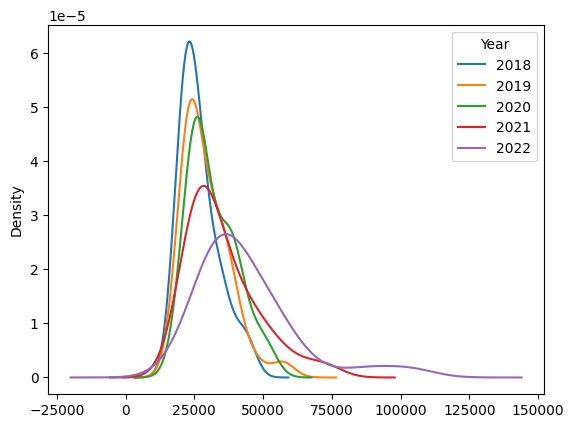

In [ ]:
cars_pivot["Price"].plot.kde()


<Axes: ylabel='Density'>

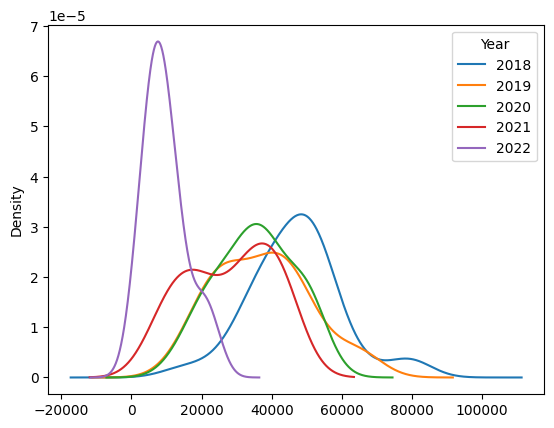

In [ ]:
cars_pivot["Miles"].plot.kde()

### `Question-3:`

You are given a dataset of **Daily Power Generation in India** of regional wise of all Power Stations. Link of the dataset: https://tinyurl.com/2nq6kugt

Task
- In this dataset, there are many columns. Two of them are `Actual(MU)` and `Excess(+) / Shortfall (-)`. `Actual(MU)` represents the actual power generation. `Excess(+) / Shortfall (-)` tells is that generated power is excess or shortfall for that particular day of a power station. You have to find out what should be the actual power generation required for that day by the power stations that there would not be any excess or shorfall power. For the result, make a new column.
- Find out the month of the day and store it as a new column.
- Find out top 10 frequently appeared power stations in this dataframe.
- Next create a pivot table of which every row represents a power station and every column represents a month in a order. Like January, February, March...
- It is hard to get inside if you look through the only pivot table. So plot the pivot table.

In [ ]:
#1
power["Req_MU"]=power['Actual(MU)'].sub(power['Excess(+) / Shortfall (-)'])
#2
power["Dates"]=pd.to_datetime(power["Dates"])
power["Month"]=power["Dates"].dt.month_name().astype("category")
power["Month"]=power["Month"].cat.set_categories(['January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'],ordered=True)
#3
top10=power['Power Station'].value_counts().sort_values(ascending=False).head(10)
top10

NameError: name 'power' is not defined

In [ ]:
#4
power_pivot=power[power["Power Station"].isin(top10.index)].pivot_table(index="Power Station",columns="Month",values=["Actual(MU)","Req_MU"])
power_pivot

In [ ]:
#5
power_pivot.plot()

In [ ]:
power.info()

In [ ]:
power=pd.read_csv("https://tinyurl.com/2nq6kugt")
power

###`Q-4` You are given a file `question-answer.csv`. Your task is to make a dataframe from it with two columns - `question` and `answers`.

* Questions in the file start from `Q<number>`; E.g.  `Q1` denotes question no. `1`
* Answers starts from `Ans<number>`; Eg. `Ans1` denotes answer of question no `1`
* MAke sure you look at columns name carefully

CSV File - "https://drive.google.com/file/d/10rmV3XrVtzpDTtYZF3UtCdcU0ajBJjGY/view?usp=share_link"

In [ ]:
qadf=pd.read_csv("/content/question-answer task 22.csv")
qadf

In [ ]:
qadf=qadf.drop("Unnamed: 0",axis=1)

In [ ]:
qadf["type"]=qadf["2"].str.split("-",n=1).str[0]
qadf["statement"]=qadf["2"].str.split("-",n=1).str[1]

In [ ]:
qadf["type_code"]=qadf['type'].str.extract(r'([A-Za-z]+)')
qadf["idx"]=qadf['type'].str.extract(r'(\d+)').astype(int)

In [ ]:
qadf

In [ ]:
final_df=qadf.pivot(index="idx",columns="type_code",values="statement").rename({"Ans":"Answer","Q":"Question"},axis=1)
final_df

In [ ]:
final_df

###`Q-5`: Print Question and answer of those questions which does not contains any question mark (`?`).


In [ ]:
#5
final_df[~(final_df["Question"].str.contains(r"\?"))]

###`Q 6-10` LOG and EMPLOYEE
6. Show `activity` details month wise. Show count for each `activity`
7. Find employee who did most `activity` in January month.
8. Employee who have worked most no of times on Weekends.
9. Which activity is logged most on buisness days.
10. Week Days wise activity table.
```
log_file = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vT-OMrmmNdOTM-B5f5F1EpCutMVG230UZiLvqlsg0NIKUKR3yrqiI2r1pEX-LvSEk-3WwySPYtvbBC-/pub?gid=1937029224&single=true&output=csv")
employee = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQ5AuFqRjSZVBKm5zyDxquX6utubq1DJKkYDI70vjeidAnyAu70KMSYpMYzeVSNVTeUIJBpfF6jU5E6/pub?gid=798824749&single=true&output=csv")

```

Note(for common field):- Employee file has `EMPLOYEE_ID` and LOG file has `emp_id`

In [2]:
log_file = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vT-OMrmmNdOTM-B5f5F1EpCutMVG230UZiLvqlsg0NIKUKR3yrqiI2r1pEX-LvSEk-3WwySPYtvbBC-/pub?gid=1937029224&single=true&output=csv")
employee = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQ5AuFqRjSZVBKm5zyDxquX6utubq1DJKkYDI70vjeidAnyAu70KMSYpMYzeVSNVTeUIJBpfF6jU5E6/pub?gid=798824749&single=true&output=csv")

In [3]:
log_file

,Log_ID,dt,dept,emp_id,activity,eqpt
0,1000,2022-01-07,Dept6,115,Cleaning,UPS
1,1001,2022-01-08,Dept4,105,Cleaning,Generator
2,1002,2022-01-09,Dept3,112,Inspection,CPU
3,1003,2022-01-10,Dept4,120,Inspection,UPS
4,1004,2022-01-11,Dept3,138,Checking,Battery
...,...,...,...,...,...,...
360,1360,2023-01-02,Dept2,122,Repair,AC
361,1361,2023-01-03,Dept4,116,Checking,Server
362,1362,2023-01-04,Dept4,110,Checking,CPU
363,1363,2023-01-05,Dept4,102,Inspection,AC


In [4]:
employee

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL
0,100,Steven,King,SKING
1,101,Neena,Kochhar,NKOCHHAR
2,102,Lex,De Haan,LDEHAAN
3,103,Alexander,Hunold,AHUNOLD
4,104,Bruce,Ernst,BERNST
5,105,David,Austin,DAUSTIN
6,106,Valli,Pataballa,VPATABAL
7,107,Diana,Lorentz,DLORENTZ
8,108,Nancy,Greenberg,NGREENBE
9,109,Daniel,Faviet,DFAVIET


In [5]:
merge=log_file.merge(employee,left_on="emp_id",right_on="EMPLOYEE_ID")
merge=merge.drop("EMPLOYEE_ID",axis=1)
merge

,Log_ID,dt,dept,emp_id,activity,eqpt,FIRST_NAME,LAST_NAME,EMAIL
0,1000,2022-01-07,Dept6,115,Cleaning,UPS,Alexander,Khoo,AKHOO
1,1001,2022-01-08,Dept4,105,Cleaning,Generator,David,Austin,DAUSTIN
2,1002,2022-01-09,Dept3,112,Inspection,CPU,NaN,Urman,JMURMAN
3,1003,2022-01-10,Dept4,120,Inspection,UPS,Matthew,Weiss,MWEISS
4,1004,2022-01-11,Dept3,138,Checking,Battery,Stephen,Stiles,SSTILES
...,...,...,...,...,...,...,...,...,...
290,1360,2023-01-02,Dept2,122,Repair,AC,Payam,Kaufling,PKAUFLING
291,1361,2023-01-03,Dept4,116,Checking,Server,Shelli,Baida,SBAIDA
292,1362,2023-01-04,Dept4,110,Checking,CPU,John,Chen,JCHEN
293,1363,2023-01-05,Dept4,102,Inspection,AC,Lex,De Haan,LDEHAAN


In [6]:
merge["dt"]=pd.to_datetime(merge["dt"])
merge["month"]=merge["dt"].dt.month_name().astype("category").cat.set_categories(['January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'],ordered=True)

In [7]:
#6
merge.pivot_table(index="activity",columns="month",aggfunc={"Log_ID":"count","emp_id":lambda x:x.value_counts().idxmax()})
#here the emp id part of the df isnt really necessary but I didnt feel like removing

/tmp/ipython-input-2185024.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  merge.pivot_table(index="activity",columns="month",aggfunc={"Log_ID":"count","emp_id":lambda x:x.value_counts().idxmax()})


Log_ID                                                      \
month      January February March April May June July August September   
activity                                                                 
Checking         6        4     6     3   4    4    5      7         8   
Cleaning         9        6     4     9   7    5    5      9         2   
Inspection       7        4     4     7   6    8   10      9        10   
Repair           5       10    12     2   8    9    2      4         5   

                                      emp_id                                 \
month      October November December January February March April  May June   
activity                                                                      
Checking        11        6        5     138      101   116   138  100  133   
Cleaning         3        9        4     115      110   126   118  131  102   
Inspection       5        4        7     120      128   106   136  138  135   
Repair           5        6        5     116      134   140   114  137  123   

                                                            
month      July August September October November December  
activity                                                    
Checking    136    123       128     107      100      115  
Cleaning    100    140       117     138      136      140  
Inspection  137    109       130     131      131      102  
Repair      130    130       101     100      113      115

In [37]:
#7
merge[merge["month"]=="January"]['emp_id'].value_counts().head(1)

,count
emp_id,
122,3


In [38]:
#8
merge["day"]=merge["dt"].dt.day_name()
merge[(merge["day"]=="Saturday")|(merge["day"]=="Sunday")]["emp_id"].value_counts().head(1)

,count
emp_id,
109,5


In [39]:
#9
merge[merge['day'].isin(["Monday","Tuesday","Wednesday","Thursday","Friday"])]["activity"].value_counts().head(1)

,count
activity,
Inspection,62


In [33]:
#10
merge.groupby("day")["activity"].value_counts()

day        activity  
Friday     Cleaning      15
           Inspection    15
           Repair         8
           Checking       7
Monday     Repair        12
           Inspection    11
           Checking       9
           Cleaning       9
Saturday   Repair        11
           Checking       9
           Cleaning       8
           Inspection     6
Sunday     Inspection    13
           Checking      11
           Repair        11
           Cleaning       9
Thursday   Cleaning      14
           Inspection    14
           Repair        11
           Checking       8
Tuesday    Inspection    13
           Checking      12
           Repair        11
           Cleaning       8
Wednesday  Checking      13
           Cleaning       9
           Inspection     9
           Repair         9
Name: count, dtype: int64

### `Q-11`:

1. There are missing value in first name of employee. Fill it using email and last name field.

> E.g- `email` -> JMURMAN and `last_name` -> 'Urman' -> so make it's first name as 'JM', Sort of (Email- lastname).

> Email is constructed from initials of first name concate with lastname. Your Task is to fill first name initials in missing data.

2. You can see email field don't have any domain name. Change this to full email addreess with domain as 'campusx.com'.
E.g- Email field -> `JMURMAN`  result -> `JMURMAN@CAMPUSX.COM`

3. Show Full Name of all the employees whose name starts with 'A' and has done any of these activity ['Incpection', 'Cleaning', 'Checking]

In [ ]:
"abc" "c"

In [57]:
#1
merge["FIRST_NAME"].fillna(merge['EMAIL'].str.removesuffix(merge['LAST_NAME'].str),inplace=True)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Log_ID      295 non-null    int64         
 1   dt          295 non-null    datetime64[ns]
 2   dept        295 non-null    object        
 3   emp_id      295 non-null    int64         
 4   activity    295 non-null    object        
 5   eqpt        295 non-null    object        
 6   FIRST_NAME  281 non-null    object        
 7   LAST_NAME   295 non-null    object        
 8   EMAIL       295 non-null    object        
 9   month       295 non-null    category      
 10  day         295 non-null    object        
dtypes: category(1), datetime64[ns](1), int64(2), object(7)
memory usage: 23.9+ KB


/tmp/ipython-input-2549275346.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merge["FIRST_NAME"].fillna(merge['EMAIL'].str.removesuffix(merge['LAST_NAME'].str),inplace=True)
